Install Required Libraries

In [ ]:
!pip install transformers
!pip install opencv-python torch

# BLIP Image Captioning in Jupyter Notebook

This notebook demonstrates how to use the BLIP (Bootstrapped Language-Image Pre-training) model to generate captions for images.


Import Libraries

In [5]:
import pickle
import cv2
from transformers import BlipProcessor, BlipForConditionalGeneration
from IPython.display import display, Image

Define BLIPCaptioning Class

In [6]:
# BLIP for Caption Generation
class BLIPCaptioning:
    def __init__(self):
        self.processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
        self.model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

    def generate_caption(self, image_path):
        img = cv2.imread(image_path)
        if img is None:
            raise ValueError("Error: Image not found. Check the image path.")
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        inputs = self.processor(images=img_rgb, return_tensors="pt")
        outputs = self.model.generate(**inputs)
        caption = self.processor.decode(outputs[0], skip_special_tokens=True)
        return caption


Helper Functions

In [7]:
# New function to generate captions
def generate_captions(model, image_path):
    try:
        caption = model.generate_caption(image_path)
        return caption
    except Exception as e:
        return f"Error during caption generation: {e}"

# Save the BLIP model to a pickle file
def save_model_to_pkl(model, pkl_file_path):
    with open(pkl_file_path, 'wb') as f:
        pickle.dump(model, f)

# Load the model from the .pkl file
def load_model_from_pkl(pkl_file_path):
    with open(pkl_file_path, 'rb') as f:
        model = pickle.load(f)  # Load the model from the pickle file
    return model

Save the Model

In [8]:
# Save the model
print("Initializing and saving the model...")
model_instance = BLIPCaptioning()
save_model_to_pkl(model_instance, 'blip_model.pkl')
print("Model saved successfully.")

# Load the model
print("Loading the model from pickle file...")
model = load_model_from_pkl('blip_model.pkl')
print("Model loaded successfully.")


Initializing and saving the model...
Model saved successfully.
Loading the model from pickle file...
Model loaded successfully.


Generate Caption for an Image

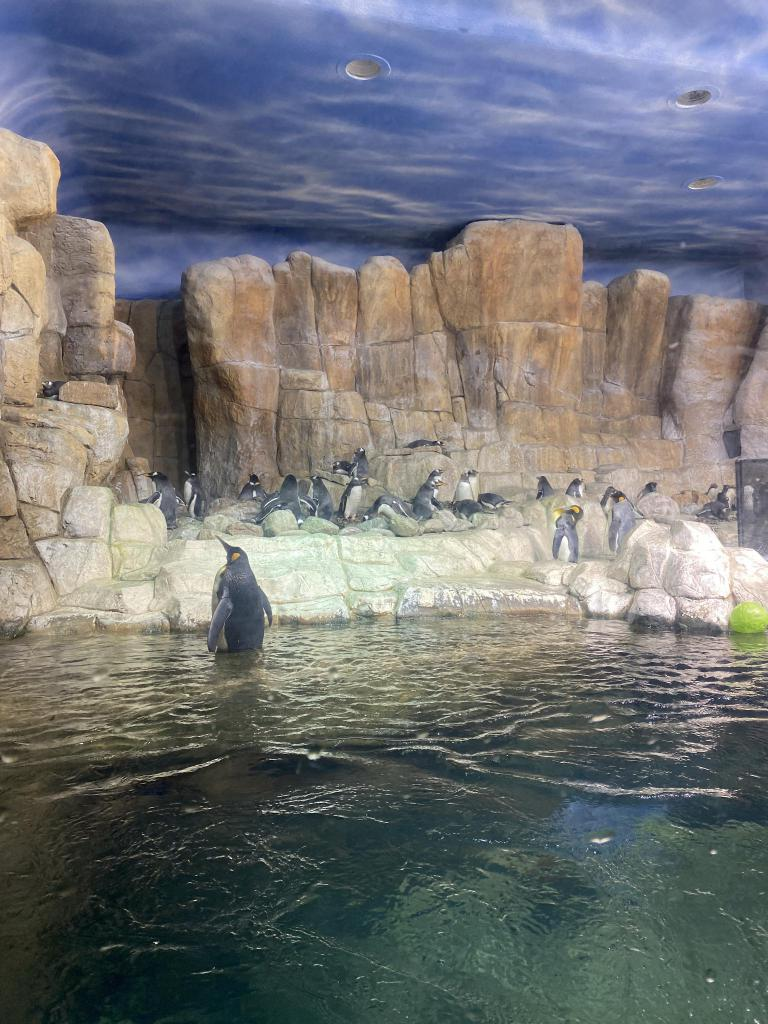

c:\Users\rm140\anaconda3\envs\tf_cuda-enabled\lib\site-packages\transformers\generation\utils.py:1375: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


Generated Caption: a group of penguins swimming in a pool


In [9]:
# Test the model with an image
image_path = r'aquarium_pretrain\\test\\images\\IMG_2301_jpeg_jpg.rf.2c19ae5efbd1f8611b5578125f001695.jpg'  # Replace with the path to your image

# Display the image
display(Image(image_path, width=400))

# Generate and display the caption
caption = generate_captions(model, image_path)
print(f"Generated Caption: {caption}")